# Heart Attack Prediction 

This data is from the  *Heart Attack Analysis & Prediction Dataset* on Kaggle

### Feature Description:


Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

caa: number of major vessels (0-3)

cp : Chest Pain type chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic
    
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
thalach : maximum heart rate achieved

output = target variable 
- 0= less chance of heart attack 
- 1= more chance of heart attack

In [1]:
import os
import numpy as np
import pandas as pd

# for visualizations 
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.metrics import precision_score, f1_score
from yellowbrick.classifier import ClassificationReport


# Exploratory Data Analysis


In [2]:
# load data
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


heart attack: 54.46%
no heart attack: 45.54%


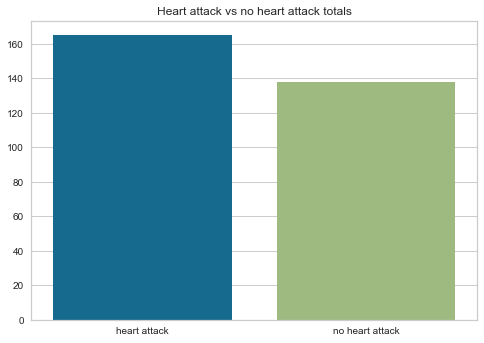

In [5]:
outcome_counts = df["output"].value_counts()
heart_attack = outcome_counts[1]
no_heart_attack = outcome_counts[0]

print("heart attack: {:.2f}%".format(heart_attack/len(df) * 100))
print("no heart attack: {:.2f}%".format(no_heart_attack/len(df) * 100))

sns.barplot(x = ['heart attack', 'no heart attack'], y = [heart_attack, no_heart_attack])
plt.title("Heart attack vs no heart attack totals")
plt.show()


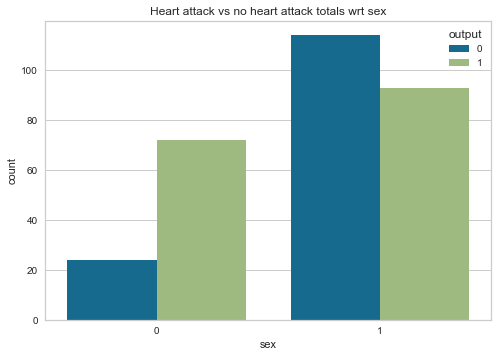

In [6]:
sns.countplot(data=df, x='sex', hue='output')
plt.title("Heart attack vs no heart attack totals wrt sex")
plt.show()

In [7]:
counts_gender = df.groupby('sex')['output'].value_counts()
male_heart_attack_num = counts_gender[1][1]
female_heart_attack_num = counts_gender[0][1]

male_heart_attack_percentage = male_heart_attack_num/(counts_gender[1][1] + counts_gender[1][0])*100
female_heart_attack_percentage = female_heart_attack_num/(counts_gender[0][1] + counts_gender[0][0])*100

print("male heart attack percentage: {:.2f}%".format(male_heart_attack_percentage))
print("female heart attack percentage: {:.2f}%".format(female_heart_attack_percentage))


male heart attack percentage: 44.93%
female heart attack percentage: 75.00%


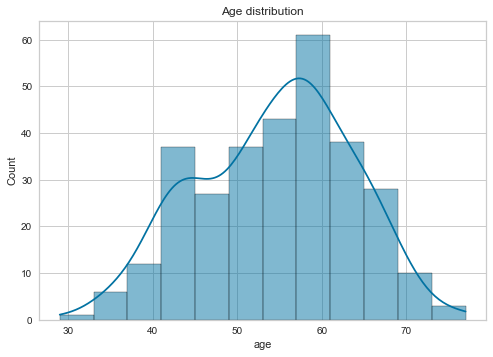

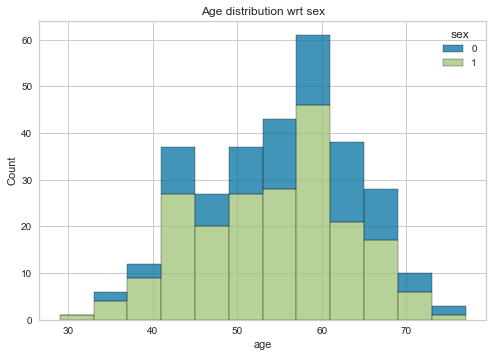

In [8]:
sns.histplot(data=df, x='age', kde=True)
plt.title("Age distribution")
plt.show()

# view sex differences 
sns.histplot(data=df, x='age', hue='sex', multiple="stack")
plt.title("Age distribution wrt sex")
plt.show()


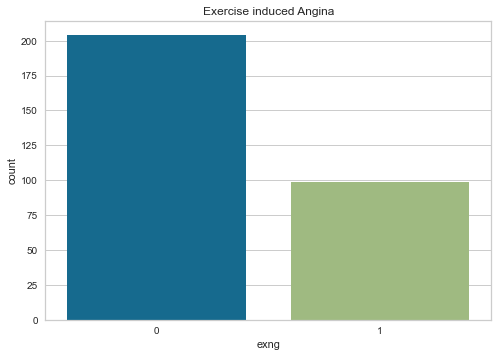

In [9]:
# exercise induced angina distribution 
sns.countplot(data=df, x = 'exng')
plt.title("Exercise induced Angina")
plt.show()


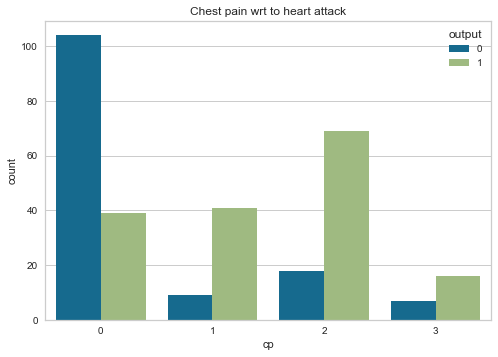

In [10]:
# chest pain type distribution 
sns.countplot(data=df, x = 'cp', hue = 'output')
plt.title("Chest pain wrt to heart attack")
plt.show()

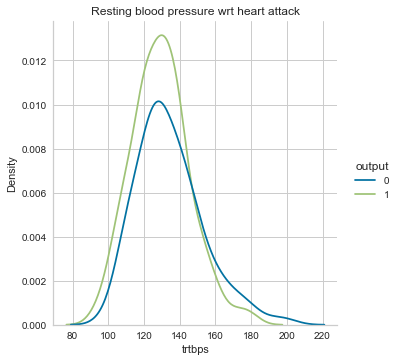

In [11]:
# resting blood pressure wrt Heart attack
sns.displot(data=df, x = 'trtbps', hue='output', kind='kde')
plt.title("Resting blood pressure wrt heart attack")
plt.show()

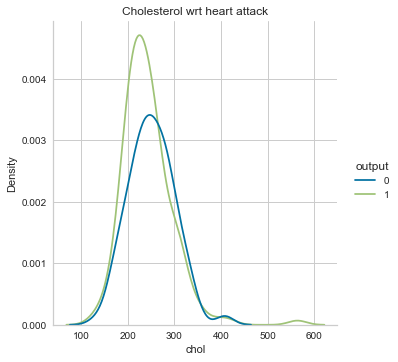

In [12]:
# cholesterol wrt heart attack
sns.displot(data=df, x = 'chol', hue='output', kind='kde')
plt.title("Cholesterol wrt heart attack")
plt.show()

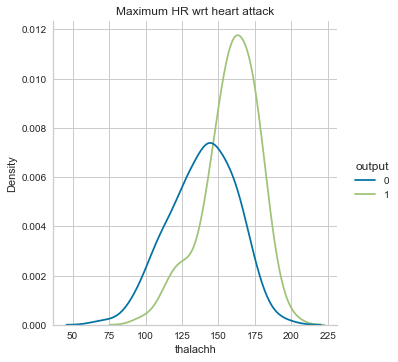

In [13]:
# max heart rate reached wrt to heart attack
sns.displot(data=df, x = 'thalachh', hue='output', kind='kde')
plt.title("Maximum HR wrt heart attack")
plt.show()

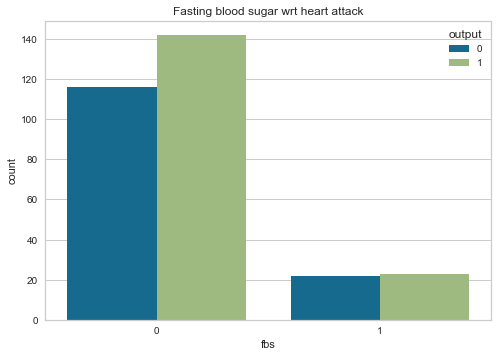

Reminder:
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)


In [14]:
# fasting blood sugar wrt Heart Attack
sns.countplot(data=df, x = 'fbs', hue='output')
plt.title("Fasting blood sugar wrt heart attack")
plt.show()
print("Reminder:\nfbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)")

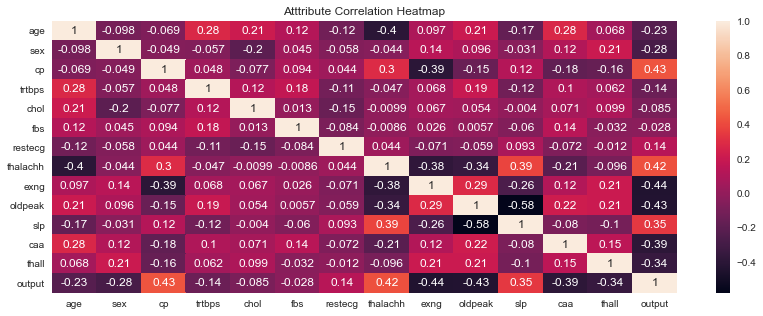

In [15]:
# correlation matrix
plt.figure(figsize=(14,5))
plt.title("Atttribute Correlation Heatmap")
sns.heatmap(df.corr(), annot=True)
plt.show()

# Modeling

In [16]:
# split data
target = df['output']
features = df.drop('output', axis=1)
features = features.drop('slp', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
features.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2
2,41,0,1,130,204,0,0,172,0,1.4,0,2
3,56,1,1,120,236,0,1,178,0,0.8,0,2
4,57,0,0,120,354,0,1,163,1,0.6,0,2


In [17]:
# Standardize trainging and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Training & Testing

In [18]:
# function to train/test and evaluate individual models
# generates visualization to analyze performance
# returns a df with performance metric scores that will be used to compare models

def Model(model):
    # trains/tests/scores model
    clf = model.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    train_accuracy = sklearn.metrics.accuracy_score(train_pred, y_train)
    test_accuracy = sklearn.metrics.accuracy_score(test_pred, y_test)
    print('Train Accuracy:', train_accuracy)
    print('Test Accuracy:', test_accuracy)
    
    # generates and plots confusion matrix for model
    fig = plt.figure(figsize=(10,5))
    fig = plt.subplot(121)
    plt.title("Confusion Matrix")
    cf_matrix = confusion_matrix(y_test, test_pred)
    sns.heatmap(cf_matrix, annot=True)
    
    # generates and plots classification report for model
    fig = plt.subplot(122)
    classes = ['No Heart Attack', 'Heart Attack']
    visualizer = ClassificationReport(model, classes=classes, support=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    # creates df of important model scores
    # df is returned in order to compare models later
    performance_scores=["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC Score"]
    model_df = pd.DataFrame(data=[test_accuracy, precision_score(y_test,test_pred),recall_score(y_test,test_pred), f1_score(y_test,test_pred), roc_auc_score(y_test,test_pred)], columns=[model], index=performance_scores)
    
    return model_df

Train Accuracy: 0.8429752066115702
Test Accuracy: 0.8688524590163934


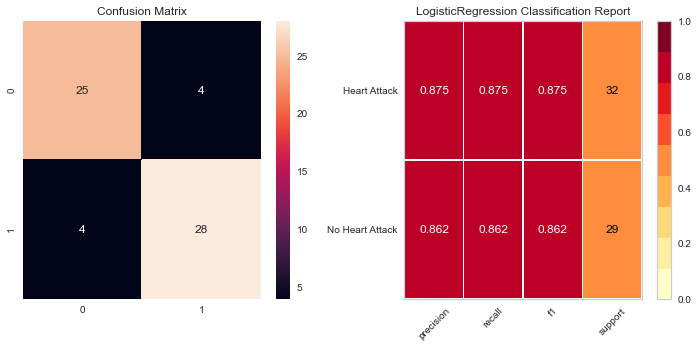

In [19]:
# Logistic Regression
logreg = LogisticRegression()
logreg_df = Model(logreg)
logreg_df.columns = ['LogisticRegression']


Train Accuracy: 0.8677685950413223
Test Accuracy: 0.8852459016393442


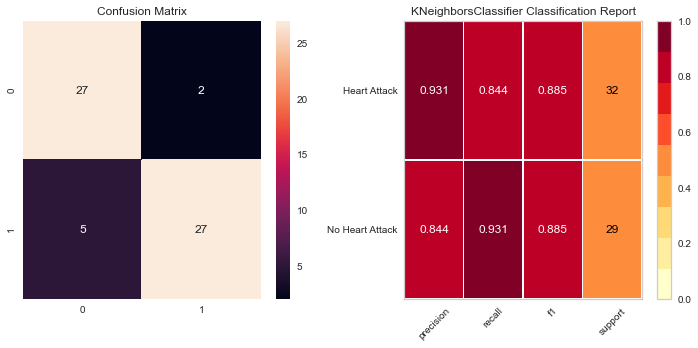

In [20]:
# kNN
knn = KNeighborsClassifier(n_neighbors=3)
knn_df = Model(knn)
knn_df.columns = ['kNN']


Train Accuracy: 1.0
Test Accuracy: 0.8360655737704918


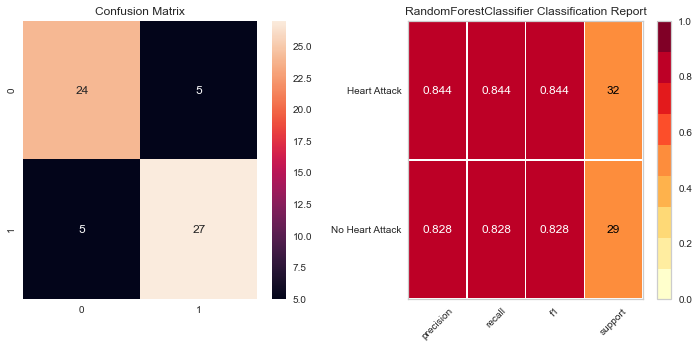

In [21]:
# Ranomdom Forest
rf = RandomForestClassifier()
rf_df = Model(rf)
rf_df.columns = ['RandomForestClassifier']


Train Accuracy: 0.9090909090909091
Test Accuracy: 0.8852459016393442


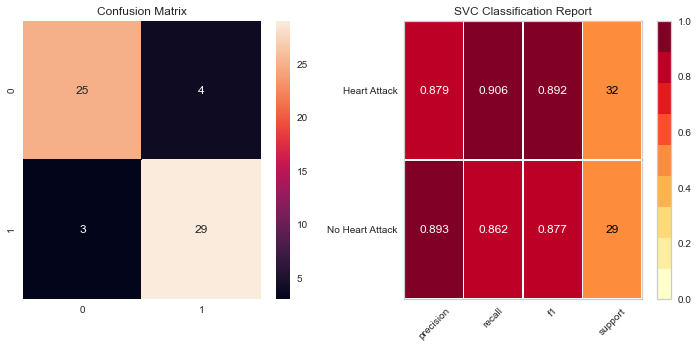

In [22]:
# SVC
svc = SVC(random_state=0)
svc_df = Model(svc)
svc_df.columns = ['SVC']

Train Accuracy: 0.8347107438016529
Test Accuracy: 0.8524590163934426


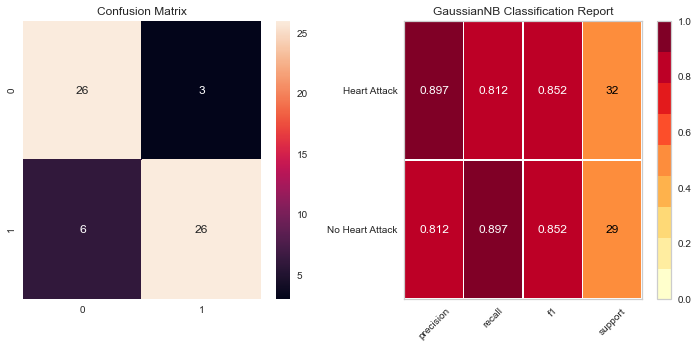

In [23]:
# Naive Bayes
gnb = GaussianNB()
gnb_df = Model(gnb)
gnb_df.columns = ['GaussianNB']

## Model Comparison

In [24]:
# combines all model_dfs into one df for ease of comparison
models_df = pd.concat([logreg_df, knn_df, rf_df, svc_df, gnb_df], axis=1)

# adds bestt scoring model for each performance metric to df
models_df['Best Score'] = models_df.idxmax(axis=1)
models_df



,LogisticRegression,kNN,RandomForestClassifier,SVC,GaussianNB,Best Score
Accuracy,0.868852,0.885246,0.836066,0.885246,0.852459,kNN
Precision,0.875000,0.931034,0.843750,0.878788,0.896552,kNN
Recall,0.875000,0.843750,0.843750,0.906250,0.812500,SVC
F1-score,0.875000,0.885246,0.843750,0.892308,0.852459,SVC
ROC AUC Score,0.868534,0.887392,0.835668,0.884159,0.854526,kNN


# Conclusion

When first looking at the model comparison it appears that kNN scored the highest in 3 out of the 5 performace tests and would be deemed the best model, but upon taking a closer look we see that kNN and SVC are tied for the best accuracy score. Both SVC and kNN each score the highest in two other perfromance metrics, leading to the assumption that the models are relatively equal at predicting heart attacks. When predicting heart attacks the worst outcome would be to predict that a person will not have a heart attack when in reality they do. This particular prediction error in this case would be a false negative. Diving deeper into the confusion matrices of both models we attempt to see if there are any differences that could help distinguish one model better than another. In the SVC confusion matrix we see there are 3 false negatives whereas the kNN model has 5. Using the differences in false negatives between the two models to be the tie breaker we come to the conclusion that SVC is the best choice.

REFERENCES:

1. https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

2. https://www.dataquest.io/blog/sci-kit-learn-tutorial/